<a href="https://colab.research.google.com/github/galrat/Neural_Networks_and_CV/blob/master/!patentability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


3. Не надо ли переключиться на парсинг патентов, вместо заявок, если это возможно?
4. Удалять неанглийский текст
5. Копировать все независимые пункты
6. проблема с парсингом по этому адресу: https://patents.google.com/patent/RU2805070C1/en


# установка пакетов

In [1]:
# установка пакетов

!pip install selenium
!pip install langid
from bs4 import BeautifulSoup
from google.colab import files

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait

import pandas as pd
import requests
import time

import re
import langid

import pickle
from itertools import product
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=1bff32e5b2ab0f859b091ea0eb20092a9371322f1ab9dc0f5649a3d7347209db
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


# Что нужно сделать для получения таблицы с патентами:
1. ниже надо ввести номера патентов для парсинга
2. затем нажать ctrl+F9 или выбрать Runtime->Run all в меню сверху

In [2]:
theme = 'air_cooling'
target_country = 'US'



In [3]:
# original numbers for parsing

numbers = '''CA-2954136-C
KR-100906717-B1
CN-101548348-B
CN-103280247-B
CN-101063595-B
KR-101229954-B1
CN-108877965-A
CN-107393605-A
JP-2009150860-A
CN-113299408-A
JP-2010256322-A
CN-102332313-A
CN-103413581-B
CN-206040367-U
JP-2018136172-A
CN-104285259-A
CN-107564592-B
CN-203071797-U
CN-109413969-A
CN-105161253-A
CN-203086321-U
CN-202940721-U
CN-203056415-U
CN-111681788-B
CN-102969661-A
CN-110232979-A
CN-109181782-B
CN-105551541-B
CN-203397717-U
JP-2016099154-A
CN-102916567-A
JP-2014181928-A
JP-2013245982-A
CN-204463982-U
CN-108880200-B
CN-108722339-A
CN-1975937-B
CN-201345606-Y
KR-20140040944-A
CN-106329888-A
CN-205122335-U
JP-2014215250-A
CN-107592780-B
CN-107221356-A
KR-20210082167-A
CN-203607214-U
US-2020027588-A1
CN-209472955-U
CN-205897947-U
RU-2361296-C1
CN-103795282-B
JP-2010243298-A
CN-113283189-A
CN-207317558-U
CN-202906723-U
CN-201820573-U
CN-215450911-U
CN-103111239-B
CN-104409122-B
CN-203300378-U
JP-2013164387-A
CN-204791997-U
CN-202084394-U
CN-111676389-A
CN-103495291-A
CN-204203710-U
CN-107893729-A
CN-202308177-U
CN-207598411-U
KR-20080002942-U
CN-207006900-U
CN-205354835-U
CN-2785106-Y
CN-111276711-B
CN-201318304-Y
CN-102280151-A
RU-2321085-C1
RU-2099801-C1
CN-116206780-A
CN-217280355-U
CN-106449032-B
CN-105344295-A
DD-298706-A5
CN-109712779-B
CN-115942713-A
RU-2271585-C1
CN-218826524-U
CN-201567267-U
CN-113737008-A
FR-2506063-A1
CN-115036103-A
CN-105396515-B
US-5406602-A
CN-116565268-A
MX-PA97003323-A
CN-117128062-A
CN-112420226-B
CN-113744902-A
CN-204834316-U
JP-H04232496-A
US-5309489-A
CN-217386850-U
CN-115497653-A
CN-216161570-U
CN-218241511-U
CN-113426383-A
CN-215963489-U
CN-211181884-U
JP-2001074874-A
CN-117637200-A
CN-205300293-U
JP-H0651078-A
CN-216930647-U
CN-217157892-U
CN-110437876-A
JP-H07131953-A
CN-202062083-U
CN-110534210-A
CN-213601630-U
CN-113113164-A
CN-205194465-U
WO-2020132835-A1
CN-113113162-A
CN-113109387-A
CN-117691159-A
CN-210778159-U
CN-205992685-U
CN-214897641-U
CN-117427473-A
JP-H07146392-A
CN-213339963-U
CN-206803495-U
CN-214503434-U
CN-219676907-U
CN-217646390-U
CN-202617010-U
CN-117239151-A
CN-219459634-U
CN-205681385-U
CN-2671221-Y
CN-2671220-Y
CN-117200518-A
CN-113782232-A
CN-219610159-U
CN-117637219-A
DE-2730729-A1
CN-113314239-A
CN-216564524-U
CN-220325457-U
JP-H04216605-A
CN-213070832-U
CN-2710988-Y
CN-112201370-A
CN-114592134-A
DE-3517632-A1
GB-1098612-A
CN-1447342-A
CN-209406289-U
CN-209076648-U

'''


# основной код

## defs

In [4]:
def get_all_claims(soup):
  claims = soup.find('div', class_='layout horizontal style-scope patent-text').text
  return claims

In [5]:
def remove_non_english_symbols(text):
  """
  Removes all non-English symbols from a text.
  """
  english_pattern = re.compile(r'[^\x00-\x7F]')
  return re.sub(english_pattern, '', text)

In [6]:
def separate_languages(text):
    sentences = text.split('.')  # You can use a more sophisticated sentence tokenizer based on your text

    english_text = []
    other_languages_text = []

    for sentence in sentences:
        # Use langid to identify the language of each sentence
        lang, confidence = langid.classify(sentence)

        if lang == 'en':
            english_text.append(sentence)
        else:
            other_languages_text.append(sentence)

    return ' '.join(english_text)

In [7]:
def get_data_from_google_patent(url, target_country):
  options = Options()
  options.add_argument("--headless")
  options.add_argument('--no-sandbox')
  options.add_argument('--user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36')
  driver = webdriver.Chrome(options=options)
  driver.get(url)
  WebDriverWait(driver, 20).until(ec.visibility_of_element_located((By.ID, 'content')))
  soup = BeautifulSoup(driver.page_source, 'lxml')

  # find US, EP, WO patent document

  others = soup.find('div', class_='event style-scope application-timeline')
  text = others.find_all(class_='style-scope application-timeline')[0]
  other_apps = ''
  for t in others.find_all(class_='style-scope application-timeline'):
      try:
        other_apps += t.get('data-result').split('patent/')[1].split('/')[0] + ','
      except:
        other_apps = other_apps
  print('other_apps', other_apps)

  if target_country not in url:
    new_app = ''
    for app_number in other_apps.split(','):
      #print('app_number', app_number)
      if 'US' in app_number:
        new_app = app_number
        break
      if 'EP' in app_number:
        new_app = app_number
        #break
      if 'WO' in app_number:
        new_app = app_number
        #break
    if new_app != '':
      url = 'https://patents.google.com/patent/' + new_app + '/en'
      print('new_url', url)
      options = Options()
      options.add_argument("--headless")
      options.add_argument('--no-sandbox')
      options.add_argument('--user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36')
      driver = webdriver.Chrome(options=options)
      driver.get(url)
      WebDriverWait(driver, 20).until(ec.visibility_of_element_located((By.ID, 'content')))
      soup = BeautifulSoup(driver.page_source, 'lxml')
    else:
      print('url is not changed since no US, EP, WO is detected', url)
  else:
    print('url is not changed since it is target')

  # title
  title = soup.find('div', id='wrapper').find('h1', id='title').text.replace('\n', '').strip()
  #print('title:', title)

  # patent_number
  patent_number = soup.find('h2', id='pubnum').text.strip().replace('\n', '').replace('\t', '')
  #print('patent_number:', patent_number)

  # applicant
  author_counter = 0
  applicant_counter = 0
  counter = 0
  author_check = 0
  applicant_check = 0
  important_people_data = soup.find('dl', class_='important-people style-scope patent-result')
  for i in important_people_data.find_all('dt', class_='style-scope patent-result'):
      if 'Inventor' in i.text:
          author_counter = counter
          author_check = 1
      if 'assignee' in i.text:
          applicant_counter = counter
          applicant_check = 1
      counter += 1
  #print('author_counter', author_counter, 'applicant_counter', applicant_counter)

  # authors
  authors = ''
  if author_check == 1:
      try:
          authors_data = soup.find('dl', class_='important-people style-scope patent-result')
          authors_data = authors_data.find_all('dt', class_='style-scope patent-result')[
              author_counter].find_next_siblings('dd')
          for author in authors_data:
              if '\n' in author.text:
                  break
              authors = authors + author.text + ';'
          authors = authors.replace('\n', '')
      except:
          #print('no authors data')
          authors = ('no authors data')
  else:
      authors = 'no_data'

  # applicants
  applicants = ''
  if applicant_check == 1:
      try:
          applicants_data = soup.find('dl', class_='important-people style-scope patent-result')
          applicants_data = applicants_data.find_all('dt', class_='style-scope patent-result')[
              applicant_counter].find_next_siblings('dd')
          for applicant in applicants_data:
              applicants = applicants + applicant.text.strip() + ';'
          applicants = applicants.replace('\n', '').strip()
      except:
          #print('no applicants data')
          applicants = ('no applicants data')
  else:
      applicants = 'no_data'
  if applicants == 'Individual;':
    applicants = authors

  # filing_date
  filind_date = 'no_data'
  publication_date = 'no_data'
  status = 'no_data'
  dates_data = soup.find_all('div', class_='event layout horizontal style-scope application-timeline')
  for data in dates_data:
      if 'filed by' in data.text:
          filind_date = data.text.split('Application')[0]
          #print('filing date:', filind_date)
      if 'Publication' in data.text:
          publication_date = data.text.split('Publication of')[0]
          #print('publication date:', publication_date)
          publication_number = data.text.split('Publication of')[1]
          #print('publication_number:', publication_number)
      if 'Status' in  data.text:
          status = data.text.split('Status')[1].replace('\n', '').replace('\t', '')
          #print('Status:', status)

  # application number
  try:
      application_number = soup.find_all('div', class_='header style-scope application-timeline')[1].text
      application_number = application_number.split('Application')[1].split('events')[0].replace(' ','')
  except:
      print('no application number data')
      application_number = 'no data'
  #print('application_number', application_number)

  # get priority applications
  priority_applications = ''
  for i in soup.find('div', class_='wrap style-scope application-timeline').find_all('div', class_='event layout horizontal style-scope application-timeline'):
    try:
      priority_applications += i.text.split('Priority to')[1].strip() + ';'
      #print(i.text.split('Priority to')[1].strip())
    except:
      no_priority = 1
  if priority_applications == '':
    priority_applications = 'no_data'

  # ipc
  ipc_data = 'no_data'
  try:
      ipcs = soup.find('div', class_='style-scope classification-viewer').find_all('div', class_='style-scope classification-tree')
      for ipc in ipcs:
          ipc_class = ipc.find(first=True).text.strip().replace('\n', '').replace('\t', '')
          #print('ipc', ipc_class)
      #print(ipc_class)
  except:
      ipc_data = 'no_data'

  ipc_datas = soup.find_all('div', class_='style-scope classification-tree')
  for i in ipc_datas[:1]:
      target = i.find_all(class_='code style-scope classification-tree')
      #print('target ipc', target[-1].text)
      # print(i.text.strip())
      ipc_data = target[-1].text

  # all claims
  claims = ''
  try:
    claims = soup.find('section', id='claims').text.strip()
    #print('claims google', claims)
  except:
    print('no claims')

  # descrition
  description = ''
  try:
    description = soup.find('section', id='description').text.strip().replace('\n\n', '\n')
    #print('descrition google', description)
  except:
    print('no description')

  # abstract
  abstract = ''
  try:
    abstract_orig = soup.find('section', id='abstract').find('span', class_='google-src-text style-scope patent-text').text#.text.replace('\n', '').replace('\t', '').replace('Abstracttranslated from ', '')
    #print('abstract_orig', abstract_orig)
    abstract_all = soup.find('section', id='abstract').text
    #print('abstract_all', abstract_all)
    abstract_eng = abstract_all.replace(abstract_orig, '').strip()
    abstract_eng = abstract_eng.replace('\n', '')
    #print('abstract_eng', abstract_eng)
    abstract = abstract_eng
  except:
    abstract = soup.find('section', id='abstract').text.replace('\n', '').replace('\t', ' ')


  # set 'printing = 1' to show info
  printing = 0
  if printing:
      print('patent_number:', patent_number)
      print('application_number:', application_number)
      print('title:', title)
      print('priority_applications:', priority_applications)
      print('filind_date:', filind_date)
      print('applicant:', applicants)
      print('authors:', authors)
      print('ipc_data:', ipc_data)
      print('publication_date:', publication_date)
      print('publication_number:', publication_number)
      print('abstract:', abstract)
      print('claims:', claims)
      print('status:', status)
      print('others:', other_apps)
      print('description', description)


  header = ['patent number', 'application_number', 'title', 'INV/UM', 'filing_date', 'applicant', 'autors',
                          'publiction_date', 'ipc', 'claims', 'status', 'abstract', 'other_applications', 'description']
  data_line = []
  data_line.append(patent_number)
  data_line.append(application_number)
  data_line.append(title)
  data_line.append(priority_applications)
  data_line.append(filind_date)
  data_line.append(applicants)
  data_line.append(authors)
  data_line.append(publication_date)
  data_line.append(publication_number)
  data_line.append(ipc_data)
  data_line.append(remove_non_english_symbols(claims.replace('\n', '')))
  data_line.append(status)
  data_line.append(remove_non_english_symbols(abstract.replace('\n', '')))
  #data_line.append(others[:-1])
  data_line.append(other_apps)
  data_line.append(remove_non_english_symbols(description))

  # =========================================================================================
  # data from the bottom reagrding similar patents

  add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[0].find_all('div', class_='tr style-scope patent-result')
  patent_lines = []
  for patent in add_patents:
    patent_line = []
    for line in patent.find_all('span'):
      #print(line.text.replace('*', '').strip())
      patent_line.append(line.text.replace('*', '').strip())
      #print('---------------------')
    #print(patent.find('span'))
    patent_lines.append(patent_line)
    #print('===========================')
    #break

  add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[1].find_all('div', class_='tr style-scope patent-result')
  for patent in add_patents:
    patent_line = []
    for line in patent.find_all('span'):
      #print(line.text.replace('*', '').strip())
      patent_line.append(line.text.replace('*', '').strip())
      #print('---------------------')
    #print(patent.find('span'))
    if len(patent_line) == 3:
      patent_line.insert(1, 'no_data')
      patent_line.insert(3, 'no_data')
    patent_lines.append(patent_line)
    #print('===========================')
    #break

  add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[2].find_all('div', class_='tr style-scope patent-result')
  for patent in add_patents:
    patent_line = []
    for line in patent.find_all('span'):
      #print(line.text.replace('*', '').strip())
      patent_line.append(line.text.replace('*', '').strip())

      #print('---------------------')
    #print(patent.find('span'))
    if len(patent_line) == 3:
      patent_line.insert(1, 'no_data')
      patent_line.insert(3, 'no_data')
    patent_lines.append(patent_line)
    #print('===========================')
    #break

  # get data for espacenet
  all_additional_urls = [url.get('href') for url in soup.find('dl', class_='links style-scope patent-result').findAll('a')]
  bottom_data = patent_lines

  return data_line, bottom_data, all_additional_urls


In [8]:
def get_patent_data(numbers, bottom_data_file, parsed_data_file_name, header):
  """
  numbers: patent numbers for parsing
  bottom_data_file: address of file for bottom data saving
  parsed_data_file_name: file for saving all parsed results in pickle format
  """
  numbers = numbers.replace('-', '')
  all_numbers = numbers.split()
  print('lenght of all_numbers:', len(all_numbers))

  # проверка, какие номера патентов еще не спарсены
  file_for_saving_results = "/content/saved_patent_numbers.txt"

  header_2 = ['patent number', 'application_number', 'title', 'priority applications', 'filing_date', 'applicant', 'authors',
                              'publiction_date', 'publiction_number', 'ipc', 'claims', 'status', 'abstract', 'other_applications', 'description']
  header_2 = header
  try:
      saved_data = pd.read_csv(file_for_saving_results, sep='\t')
      parsed_numbers = saved_data['original_number'].values
      #print('parsed_numbers', parsed_numbers)
  except:
      parsed_numbers = []
      with open(file_for_saving_results, 'a', encoding="utf-8") as file:
          file.writelines('\t'.join(['original_number'] + header_2) + '\n')
      print("creating new file")

  remaining_numbers = list(set(all_numbers) - set(parsed_numbers))
  print('remaining_numbers', remaining_numbers)
  print('total remaining', len(remaining_numbers))

  # correct app_numbers
  remaining_numbers_corrected = []
  for number in remaining_numbers:
      if number[:2] == 'WO' and len(number) == 12:
          number = 'WO20' + number[2:] + '/en'
      remaining_numbers_corrected.append(number)

  # парсинг по номерам патентов
  final_urls = []
  for app_num in remaining_numbers_corrected:
    if app_num[:3] == 'US2' and len(app_num) == 14:
        url =  app_num[:].replace('-', '')[:6] + '0' + app_num[:].replace('-', '')[6:] + '/en'
        url = 'https://patents.google.com/patent/' + url
        print('corrected url', url)
    else:
        url = 'https://patents.google.com/patent/' + app_num[:].replace('-', '').replace('\n', '') + '/en'
        print('url', url)
    final_urls.append(url)

  print('final_urls', final_urls)

  # результаты

  # get data by url
  print('\nstart of parsing')
  counter = 1
  parsed_data=[]
  wrong_numbers = []
  bottom_data = []
  espacenet_urls = []
  for original_number, url in zip(remaining_numbers, final_urls[:]):
    try:
      print(counter, '/', len(remaining_numbers))
      counter += 1
      print(url)
      data_line_google = get_data_from_google_patent(url, target_country)

      print('data_line_google[0] - patent_data', data_line_google[0])
      print('data_line_google[1] - bottom data', data_line_google[1])
      bottom_data += data_line_google[1]

      # get espacenet url
      all_additional_urls = data_line_google[2]

      parsed_data.append(data_line_google[0])
      with open(file_for_saving_results, 'a', encoding="utf-8") as file:
          file.writelines('\t'.join([original_number]) + '\n')
          print('writing')

      try:
        with open(parsed_data_file_name, 'rb') as f:
          existing_data = pickle.load(f)
      except:
        print('creating new pickle file')
        existing_data = []
      existing_data += [data_line_google[0]]

      #pd.DataFrame(parsed_data).to_pickle(parsed_data_file_name)
      with open(parsed_data_file_name, 'wb') as file:
        # Save the dataframe to the file with UTF-8 encoding
        pickle.dump(existing_data, file, protocol=pickle.HIGHEST_PROTOCOL)

    except:
      wrong_numbers.append(original_number)
      print('smth wrong')


    print()
    #break
  print('====================finish=========================')
  print('wrong_numbers which shall be reparsed', wrong_numbers)

  # download the created file
  #files.download(file_for_saving_results)
  bottom_data_2 = []

  for line in bottom_data[1:]:
    if len(line) == 5 and 'Family To Family Citations' not in line[0] and 'Priority date' not in line[1]:
      bottom_data_2.append(line)
  bottom_data_df = pd.DataFrame(bottom_data_2[0:], columns=['publication number', 'Priority date', 'publication date',  'assignee',  'title'])

  return parsed_data, bottom_data_df

## code

In [9]:

# первый этап, на котором парсятся номера патентов и собираются данные из bottom part (cited, citing, similar)
header = ['patent number', 'application_number', 'title', 'priority applications', 'filing_date', 'applicant', 'authors', 'publiction_date', 'publication_number', 'ipc', 'claims', 'status', 'abstract', 'other_applications', 'description']
bottom_data_file = 'bottom_data_step_1.txt'
parsed_data_file_name = 'parsed_data_step_1.pickle'
parsing_result = get_patent_data(numbers, bottom_data_file, parsed_data_file_name, header)

first_parsing_df = pd.DataFrame(parsing_result[0])


#first_step_data = pd.read_csv('/content/saved_data.txt', sep='\t')
print('количество документов на первом этапе', len(first_parsing_df))



lenght of all_numbers: 159
creating new file
remaining_numbers ['JPH0651078A', 'CN117427473A', 'CN201567267U', 'CN216564524U', 'CN204463982U', 'CN102969661A', 'CN113426383A', 'CN201820573U', 'CN102280151A', 'JP2014181928A', 'JP2001074874A', 'US5406602A', 'JPH07146392A', 'CN205300293U', 'CN205194465U', 'CN219676907U', 'CN207598411U', 'CN110437876A', 'CN218826524U', 'CN203397717U', 'CN204791997U', 'CN217386850U', 'CN207317558U', 'CN1975937B', 'CN111276711B', 'CN105551541B', 'CN101063595B', 'CN104285259A', 'CN109413969A', 'CN117128062A', 'DD298706A5', 'CN202062083U', 'JP2013164387A', 'CN113314239A', 'CN202906723U', 'CN103111239B', 'CN103413581B', 'CN215450911U', 'CN220325457U', 'CN217280355U', 'CN113113164A', 'CN203086321U', 'CN113737008A', 'CN115497653A', 'CN2785106Y', 'CN213601630U', 'CN205897947U', 'CN107393605A', 'CN110534210A', 'CN201318304Y', 'CN209472955U', 'CN209406289U', 'CN107592780B', 'CN2710988Y', 'JP2018136172A', 'CN209076648U', 'JP2013245982A', 'RU2321085C1', 'CN117691159A',

In [10]:
file_address = '/content/parsed_data_step_1.pickle'
with open(file_address, 'rb') as f:
    # Load the dataframe from the file
    data = pickle.load(f)
first_step_parsing_df = pd.DataFrame(data, columns=header)
first_step_parsing_df.head(2)

patent number application_number  \
0   JPH0651078A         JP4221997A   
1  CN117427473A  CN202311483307.7A   

                                               title priority applications  \
0  Liquid metal cooling type high speed reactor a...           JP4221997A;   
1  Belt type oil-cooled dielectric barrier discha...    CN202311483307.7A;   

  filing_date                                          applicant  \
0  1992-07-29  Doryokuro Kakunenryo Kaihatsu Jigyodan;Power R...   
1  2023-11-07                         Guizhou Power Grid Co Ltd;   

                       authors publiction_date publication_number        ipc  \
0           Akira Otsubo;章 大坪;      1998-04-15        JP2740995B2  Y02E30/30   
1  张英;王明伟;刘喆;余鹏程;李朝杰;黄宇;丁超;樊磊;      2024-01-23       CN117427473A  B01D53/32   

                                              claims                 status  \
0  Claims (3)                      Hide Dependent...  Expired - Fee Related   
1  Claims (10)                      Hide Dependen...                Pending   

                                            abstract other_applications  \
0  Abstracttranslated from PURPOSE:To keep the wa...       JP2740995B2,   
1  Abstracttranslated from The invention relates ...      CN117427473A,   

                                         description  
0  Description\ntranslated from Japanese\n\n\n\n\...  
1  Description\ntranslated from \n\n\n\n\n\nBelt ...

In [11]:
first_step_parsing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patent number          159 non-null    object
 1   application_number     159 non-null    object
 2   title                  159 non-null    object
 3   priority applications  159 non-null    object
 4   filing_date            159 non-null    object
 5   applicant              159 non-null    object
 6   authors                159 non-null    object
 7   publiction_date        159 non-null    object
 8   publication_number     159 non-null    object
 9   ipc                    159 non-null    object
 10  claims                 159 non-null    object
 11  status                 159 non-null    object
 12  abstract               159 non-null    object
 13  other_applications     159 non-null    object
 14  description            159 non-null    object
dtypes: object(15)
memory us

In [12]:
already_parsed = first_step_parsing_df['patent number'].values
first_step_parsing_df.to_pickle(theme + '_first_step.pickle')
files.download(theme + '_first_step.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
cited_df = pd.DataFrame(parsing_result[1])
cited_df.to_csv(theme + '_cited_first_step.csv')
files.download((theme + '_cited_first_step.csv'))
cited_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

publication number Priority date  publication date  \
0         JP2019515319A    2016-05-04        2019-06-06   
1           RU2713473C2    2010-02-22        2020-02-05   
2           Publication       no_data  Publication Date   
3           US9111652B2       no_data        2015-08-18   
4           US6795518B1       no_data        2004-09-21   
...                 ...           ...               ...   
3886       CN201119247Y       no_data        2008-09-17   
3887       CN202855872U       no_data        2013-04-03   
3888       CN204334292U       no_data        2015-05-13   
3889       CN202435196U       no_data        2012-09-12   
3890       CN202565150U       no_data        2012-11-28   

                          assignee  \
0                      チノッティ ルチャーノ   
1     Эдвансд Риэктор Консептс Ллк   
2                          no_data   
3                          no_data   
4                          no_data   
...                            ...   
3886                       no_data   
3887                       no_data   
3888                       no_data   
3889                       no_data   
3890                       no_data   

                                                  title  
0                     Reactor with a free standing core  
1     Nuclear reactor system and nuclear energy gene...  
2                                                 Title  
3     High-temperature gas-cooled reactor steam gene...  
4     Integral PWR with diverse emergency cooling an...  
...                                                 ...  
3886     Liquid cooling auxiliary heat radiation device  
3887  Phase transition microemulsion heat spreading ...  
3888             A kind of power cabinet cooling system  
3889             Cooling device for wind generating set  
3890  Converter adopting heat pipe to self cool and ...  

[3891 rows x 5 columns]

In [14]:
# обработка bottom file

title_filter_presence = ['']
title_filter_absence =  ['photosynthe']
number_stop_words = [' et al.'] # to delete articles and save patents

df = cited_df
print('исходное количество bottom patents:', len(df))

# duplicates removing
df = df.drop_duplicates(['publication number'], keep='first')
df = df.dropna()
filtered_df = df[~df['publication number'].isin(already_parsed)]
print('первый этап фильтрации (drop_duplicates, dropna, drop already parsed)', len(filtered_df))

# title filtering

filtered_df = filtered_df[filtered_df['title'].str.contains('|'.join(title_filter_presence), case=False) & ~filtered_df['title'].str.contains('|'.join(title_filter_absence), case=False)]
filtered_df = filtered_df[~filtered_df['publication number'].str.contains('|'.join(number_stop_words), case=False)]
print('второй этап фильтрации (по ключевым словам в названии)', len(filtered_df))
#print(filtered_df[['publication number', 'title']])
print('отфильтрованы (исключены)', set(df['publication number'].values) - set(filtered_df['publication number'].values))
print()

pattern = r'^[A-Z]{2}'
filtered_df = filtered_df[filtered_df['publication number'].str.match(pattern)]
print('общее количество документов', len(filtered_df))

#filtered_df['publication date'] = pd.to_datetime(filtered_df['publication date'])

filtered_df = filtered_df.sort_values('title', ascending=True)
for i in range(len(filtered_df)):
  print(filtered_df.iloc[i][['title']].values)

second_step_numbers = '\n'.join(filtered_df['publication number'].values)
#print('третий этап фильтрации (только целевая страна, только подходящая дата)', len(filtered_df['publication number'].values), '\n', second_step_numbers)


исходное количество bottom patents: 3891
первый этап фильтрации (drop_duplicates, dropna, drop already parsed) 3171
второй этап фильтрации (по ключевым словам в названии) 3110
отфильтрованы (исключены) {'US9595357B2', 'Silin et al.', 'CN204463982U', 'US9177675B2', 'CN102969661A', 'CN201820573U', 'JP2001074874A', 'US5406602A', 'Klotz et al.', 'Yedder et al.', 'Lyczkowski et al.', 'Conway et al.', 'Griboriev et al.', 'Yanhua et al.', 'Eerkens et al.', 'Hejzlar et al.', 'CN207598411U', 'CN110437876A', 'CN203397717U', 'Fletcher et al.', 'Toshinsky et al.', 'CN204791997U', 'CN207317558U', 'CN1975937B', 'CN111276711B', 'CN105551541B', 'CN109413969A', 'DD298706A5', 'Grant et al.', 'JP2013164387A', 'Cho et al.', 'US5043136A', 'CN202906723U', 'CN103111239B', 'CN103413581B', 'Yu et al.', 'Xia et al.', 'Bandini et al.', 'CN215450911U', 'CN113113164A', 'CN203086321U', 'CN115497653A', 'CN113737008A', 'CN2785106Y', 'CN205897947U', 'Zhao et al.', 'CN107393605A', 'Heki et al.', 'US10991471B2', 'CN1105

In [15]:
second_step_for_parsing = '\n'.join(filtered_df['publication number'].values)

In [16]:
second_step_numbers = second_step_for_parsing[:100] # здесь надо убрать 55
second_step_numbers

'BE573083A\nDE3425144C2\nCH672965A5\nDE3435255C2\nJPS6241565Y2\nDE3621516C2\nJPH0345800B2\nDE3115344C2\nJPS54'

In [17]:
# stop, здесь надо проверить, все ли ок и парсить ли bottom


In [18]:
# второй этап, на котором парсятся данные по номерам патентов из bottom part после первого парсинга

bottom_data_file_empty = '/content/bottom_data_step_empty.txt' # второй bottom data файл не используется, но его нужно указать
parsed_data_file_name = 'parsed_data_step_2.pickle'
#print(second_step_numbers)
parsing_result_2 = get_patent_data(second_step_numbers, bottom_data_file_empty, parsed_data_file_name, header)


lenght of all_numbers: 9
remaining_numbers ['BE573083A', 'JPH0345800B2', 'DE3621516C2', 'CH672965A5', 'JPS6241565Y2', 'DE3435255C2', 'DE3425144C2', 'DE3115344C2', 'JPS54']
total remaining 9
url https://patents.google.com/patent/BE573083A/en
url https://patents.google.com/patent/JPH0345800B2/en
url https://patents.google.com/patent/DE3621516C2/en
url https://patents.google.com/patent/CH672965A5/en
url https://patents.google.com/patent/JPS6241565Y2/en
url https://patents.google.com/patent/DE3435255C2/en
url https://patents.google.com/patent/DE3425144C2/en
url https://patents.google.com/patent/DE3115344C2/en
url https://patents.google.com/patent/JPS54/en
final_urls ['https://patents.google.com/patent/BE573083A/en', 'https://patents.google.com/patent/JPH0345800B2/en', 'https://patents.google.com/patent/DE3621516C2/en', 'https://patents.google.com/patent/CH672965A5/en', 'https://patents.google.com/patent/JPS6241565Y2/en', 'https://patents.google.com/patent/DE3435255C2/en', 'https://patents.

In [19]:
second_step_parsing_df = pd.DataFrame(parsing_result_2[0], columns=header)
second_step_parsing_df

patent number application_number  \
0    US2961393A          US697295A   
1  JPH0345800B2        JP58170438A   
2    US4761260A       US07/066,464   
3    US4761260A       US07/066,464   
4  JPS6241565Y2         JP6639581U   
5    US4689194A       US06/780,260   
6    US4759901A       US06/752,544   
7   DE3115344C2      DE19813115344   

                                               title  \
0                              Power breeder reactor   
1                                                      
2  Nuclear power plant with a high temperature re...   
3  Nuclear power plant with a high temperature re...   
4                                                      
5  Nuclear reactor plant with a small high temper...   
6  Nuclear reactor installation arranged in the c...   
7                                                      

                        priority applications filing_date  \
0  BE573083D;US697295A;GB33024/58A;FR779325A;  1957-11-18   
1                                JP58170438A;  1983-09-14   
2                                     no_data  1987-06-26   
3                                     no_data  1987-06-26   
4                                 JP6639581U;     no_data   
5                                     no_data  1985-09-26   
6                                     no_data  1985-07-08   
7                              DE19813115344;  1981-04-15   

                                applicant  \
0                         Harry O Monson;   
1  Toshiba Engineering Corp;Toshiba Corp;   
2         Hochtemperatur Reaktorbau GmbH;   
3         Hochtemperatur Reaktorbau GmbH;   
4                                 no_data   
5         Hochtemperatur Reaktorbau GmbH;   
6         Hochtemperatur Reaktorbau GmbH;   
7                             Siemens AG;   

                                       authors publiction_date  \
0                              Harry O Monson;      1960-11-22   
1                  Shoji Sakurai;Nobuo Ishida;      1991-07-12   
2             Hermann Schmitt;Josef Schoening;      1988-08-02   
3             Hermann Schmitt;Josef Schoening;      1988-08-02   
4                                      no_data      1987-10-24   
5             Winfried Wachholz;Ulrich Weicht;      1987-08-25   
6             Windried Wachholz;Ulrich Weicht;      1988-07-26   
7  Gerhard Dipl.-Ing. 8521 Uttenreuth De Frei;      1992-05-27   

  publication_number         ipc  \
0         US2961393A    G21C1/32   
1       JPH0345800B2   Y02E30/00   
2         US4761260A    G21D9/00   
3         US4761260A    G21D9/00   
4       JPS6241565Y2     no_data   
5         US4689194A   G21C15/18   
6         US4759901A   G21C15/18   
7        DE3115344C2  F22B35/004   

                                              claims                 status  \
0  Claims (1)                      Hide Dependent...     Expired - Lifetime   
1  Claims (1)                      Hide Dependent...                Granted   
2  Claims (11)                      Hide Dependen...  Expired - Fee Related   
3  Claims (11)                      Hide Dependen...  Expired - Fee Related   
4  Claims (1)                      Hide Dependent...                Expired   
5  Claims (14)                      Hide Dependen...  Expired - Fee Related   
6  Claims (4)                      Hide Dependent...  Expired - Fee Related   
7  Claims (4)                      Hide Dependent...                Granted   

                                            abstract  \
0                           Abstracttranslated from    
1                           Abstracttranslated from    
2  Abstracttranslated from A nuclear power plant ...   
3  Abstracttranslated from A nuclear power plant ...   
4                           Abstracttranslated from    
5  Abstracttranslated from A nuclear reactor plan...   
6  Abstracttranslated from A nuclear reactor inst...   
7                           Abstracttranslated from    

                                  other_applications  \
0    

In [20]:
# получаю большой df, оставляю в нем только номер, описание. Анализирую описание, чтобы найти абзацы с ключевыми словами. ключевые слова должны быть с OR и с AND.

In [21]:
merged_df = pd.concat([first_step_parsing_df, second_step_parsing_df], ignore_index=True)

merged_df

patent number application_number  \
0     JPH0651078A         JP4221997A   
1    CN117427473A  CN202311483307.7A   
2    CN201567267U   CN200920243337XU   
3    CN216564524U  CN202122771355.9U   
4    CN204463982U  CN201520159865.2U   
..            ...                ...   
162    US4761260A       US07/066,464   
163  JPS6241565Y2         JP6639581U   
164    US4689194A       US06/780,260   
165    US4759901A       US06/752,544   
166   DE3115344C2      DE19813115344   

                                                 title priority applications  \
0    Liquid metal cooling type high speed reactor a...           JP4221997A;   
1    Belt type oil-cooled dielectric barrier discha...    CN202311483307.7A;   
2    Applying device of air-cooling module type col...     CN200920243337XU;   
3    Air-cooled high-voltage reactive power compens...    CN202122771355.9U;   
4    Underground heat low-temperature air-cooling r...    CN201520159865.2U;   
..                                                 ...                   ...   
162  Nuclear power plant with a high temperature re...               no_data   
163                                                              JP6639581U;   
164  Nuclear reactor plant with a small high temper...               no_data   
165  Nuclear reactor installation arranged in the c...               no_data   
166                                                           DE19813115344;   

    filing_date                                          applicant  \
0    1992-07-29  Doryokuro Kakunenryo Kaihatsu Jigyodan;Power R...   
1    2023-11-07                         Guizhou Power Grid Co Ltd;   
2    2009-11-19  Deepblue Environmental Protection Technologies...   
3    2021-11-12                  Cisdi Electric Technology Co ltd;   
4    2015-03-20                                                李磊;   
..          ...                                                ...   
162  1987-06-26                    Hochtemperatur Reaktorbau GmbH;   
163     no_data                                            no_data   
164  1985-09-26                    Hochtemperatur Reaktorbau GmbH;   
165  1985-07-08                    Hochtemperatur Reaktorbau GmbH;   
166  1981-04-15                                        Siemens AG;   

                                         authors publiction_date  \
0                             Akira Otsubo;章 大坪;      1998-04-15   
1                    张英;王明伟;刘喆;余鹏程;李朝杰;黄宇;丁超;樊磊;      2024-01-23   
2                                            谢非;      2010-09-01   
3                            干永革;马晓宇;陈昶;王雪青;黄林波;      2022-05-17   
4                                            李磊;      2015-07-08   
..                                           ...             ...   
162             Hermann Schmitt;Josef Schoening;      1988-08-02   
163                                      no_data      1987-10-24   
164             Winfried Wachholz;Ulrich Weicht;      1987-08-25   
165             Windried Wachholz;Ulrich Weicht;      1988-07-26   
166  Gerhard Dipl.-Ing. 8521 Uttenreuth De Frei;      1992-05-27   

    publication_number         ipc  \
0          JP2740995B2   Y02E30/30   
1         CN117427473A   B01D53/32   
2         CN201567267U   Y02W10/12   
3         CN216564524U   Y02E40/30   
4         CN204463982U     no_data   
..                 ...         ...   
162         US4761260A    G21D9/00   
163       JPS6241565Y2     no_data   
164         US4689194A   G21C15/18   
165         US4759901A   G21C15/18   
166        DE3115344C2  F22B35/004   

                                                claims                 status  \
0    Claims (3)                      Hide Dependent...  Expired - Fee Related   
1    Claims (10)                      Hide Dependen...                Pending   
2    Claims (1)                      Hide Dependent...     Expired - Lifetime   
3    Claims (5)                      Hide Dependent...                 Active   
4    Claims (3)                      Hide 

In [22]:
merged_df[merged_df.columns[:-1]].to_csv('/content/' + theme + '_merged_df.csv')
merged_df.to_pickle(theme + '_merged_df.pkl')

# обработка спарсенных файлов

In [23]:
merged_adress = theme + '_merged_df.pkl'


merged_df = pd.read_pickle(merged_adress)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patent number          167 non-null    object
 1   application_number     167 non-null    object
 2   title                  167 non-null    object
 3   priority applications  167 non-null    object
 4   filing_date            167 non-null    object
 5   applicant              167 non-null    object
 6   authors                167 non-null    object
 7   publiction_date        167 non-null    object
 8   publication_number     167 non-null    object
 9   ipc                    167 non-null    object
 10  claims                 167 non-null    object
 11  status                 167 non-null    object
 12  abstract               167 non-null    object
 13  other_applications     167 non-null    object
 14  description            167 non-null    object
dtypes: object(15)
memory us

# novelty analysis


## defs

In [25]:

def match_condition(sentence, condition):
    # Split the condition into individual words
    words = condition.split(" OR ")

    # Check if any word from the condition is present in the sentence
    return any(word.lower() in sentence.lower() for word in words)

def save_sentences_with_conditions(text, conditions):
    # Tokenize the text into sentences
    sentences = re.split(r'[.!?\n]', text)

    # Initialize a list to store the sentences that meet the conditions
    result = []

    # Iterate over each sentence
    for sentence in sentences:
        # Check if the sentence meets any condition from the list of conditions
        if all(match_condition(sentence, condition) for condition in conditions):
            result.append(sentence.strip())

    return result


def get_words_from_condition(conditions):
  all_words = []

  # Iterate over each element
  for element in conditions:
      # Split the element into individual words
      words = element.split(" OR ")
      # Add the words to the list of all words
      all_words.extend(words)
  return all_words


def capitalize_words(sentence, words_list):
    # Split the sentence into words
    words = sentence.split()

    # Capitalize words from the list within the sentence
    for word in words_list:
        #print('word', word)
        for i in range(len(words)):
            if  word.lower() in words[i].lower():
                words[i] = words[i].upper()
                #print('words[i]', words[i])

    # Join the words back into a sentence
    capitalized_sentence = ' '.join(words)

    return capitalized_sentence


import re

def remove_non_english(text):
    # Regular expression to match non-English characters
    non_english_pattern = re.compile(r'[^\x00-\x7F]+')
    # Replace non-English characters with an empty string
    cleaned_text = non_english_pattern.sub('', text)
    return cleaned_text



## code

In [36]:
# форма запроса: [term_1 OR term_2, term_3 OR term_4] ищет предложения, в которых встречается два термина из четырех
conditions = [
              ['igni'],
              ['methane OR propane', 'igni OR combust', 'oxygen'],
              ['critical'],
              ['spark'],
              ['puls'],
              ['critical, expiration OR flow OR narrow'],
              ['hole'],
              ['expira']
              ]

conditions = [
              ['natural fiber OR straw OR haulm OR halm OR thatch OR straw'],
              ['wood fiber'],
              ['Humus OR peat OR turf'],
              ['vermiculite OR perlite'],
              ['mycorrhiza'],
              ['hydroseed'],
              ['humus']
              ]

conditions = [
              ['air cool'],
              ['reactor'],
              ['combustion'],
              ['chamber'],
              ['cooling chamber', 'air'],
              ['thermal', 'insulation'],
              ['burner']
              ]


In [37]:
final = []
for patent_number, title, abstract, sentenses in zip(merged_df['patent number'], merged_df['title'], merged_df['abstract'], merged_df['description']):
  final_results = []
  #print(patent_number)
  #print(sentenses)

  #print('================================')
  for condition in conditions:
    all_words = get_words_from_condition(condition)
    #print(all_words)
    result = save_sentences_with_conditions(sentenses, condition)

    # Print the result
    final_result = ''
    for sentence in result:
        #print(capitalize_words(sentence, all_words))
        final_result += (capitalize_words(sentence, all_words)) + '\n'
    #print('final_result', final_result)
    final_results.append(remove_non_english(final_result))
  #print('--------------------')
  final_results = [patent_number, title, abstract] + final_results
  #print('final_results\n', final_results)
  #break
  final.append(final_results)
  #break


In [38]:
df_columns = []
for condition in conditions:
  df_columns.append(' AND '.join(condition))
df_columns = ['patent number', 'title', 'abstract'] + df_columns


In [39]:
visual_df = pd.DataFrame(final, columns=df_columns)

In [40]:
visual_df = pd.DataFrame(final, columns=df_columns)
visual_df = visual_df.replace('', np.nan)
visual_df['NaN_count'] = visual_df.isna().sum(axis=1)
visual_df.drop(columns='NaN_count', inplace=True)
visual_df.head(3)


patent number                                              title  \
0   JPH0651078A  Liquid metal cooling type high speed reactor a...   
1  CN117427473A  Belt type oil-cooled dielectric barrier discha...   
2  CN201567267U  Applying device of air-cooling module type col...   

                                            abstract  \
0  Abstracttranslated from PURPOSE:To keep the wa...   
1  Abstracttranslated from The invention relates ...   
2  Abstracttranslated from The utility model rela...   

                                            air cool  \
0  Field of the Invention The present invention r...   
1  When the dielectric barrier discharge degradat...   
2                                                NaN   

                                             reactor combustion chamber  \
0  Field of the Invention The present invention r...        NaN     NaN   
1  In order to solve the technical problems, the ...        NaN     NaN   
2  The air-cooled modular cold and hot water unit...        NaN     NaN   

  cooling chamber AND air thermal AND insulation burner  
0                     NaN                    NaN    NaN  
1                     NaN                    NaN    NaN  
2                     NaN                    NaN    NaN

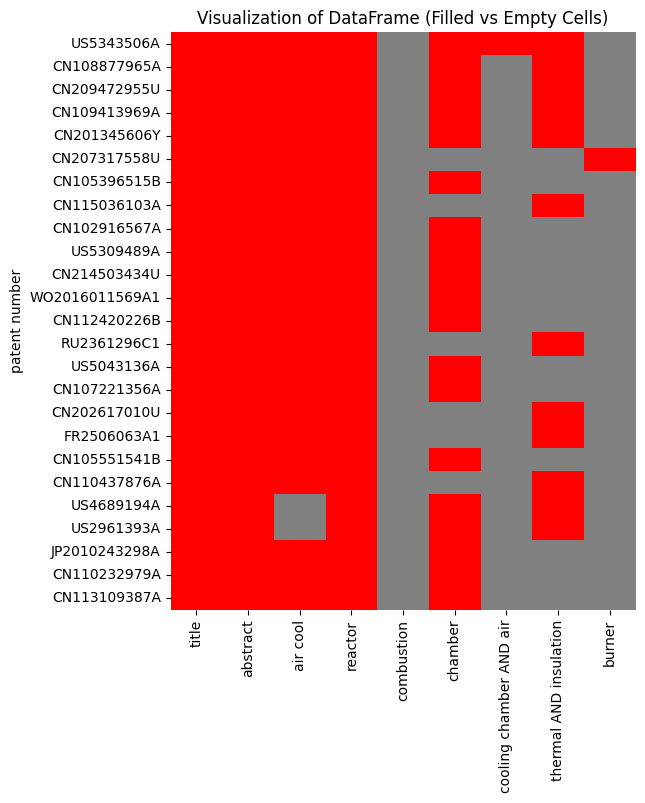

In [41]:
visual_df = visual_df.replace('', np.nan)
df = visual_df.dropna(subset=visual_df.columns[1:], how='all')
df.set_index(df.columns[0], inplace=True)
# Replace empty cells with NaN
df_nan = df.replace('', np.nan)

empty_counts = df.isnull().sum(axis=1)

# Add the empty_counts as a new column to the DataFrame
df_nan['Empty_Counts'] = empty_counts

# Sort the DataFrame by the empty counts in ascending order
df_nan = df_nan.sort_values(by='Empty_Counts')

# Drop the empty_counts column if not needed
df_nan.drop(columns='Empty_Counts', inplace=True)
df_nan = df_nan.head(25)

# Generate a heatmap with seaborn
plt.figure(figsize=(6, 0.3*len(df_nan)))
sns.heatmap(df_nan.isnull(), cmap=['red', 'grey'], cbar=False)
plt.title('Visualization of DataFrame (Filled vs Empty Cells)')
plt.show()

In [42]:
df_nan.index.values

array(['US5343506A', 'CN108877965A', 'CN209472955U', 'CN109413969A',
       'CN201345606Y', 'CN207317558U', 'CN105396515B', 'CN115036103A',
       'CN102916567A', 'US5309489A', 'CN214503434U', 'WO2016011569A1',
       'CN112420226B', 'RU2361296C1', 'US5043136A', 'CN107221356A',
       'CN202617010U', 'FR2506063A1', 'CN105551541B', 'CN110437876A',
       'US4689194A', 'US2961393A', 'JP2010243298A', 'CN110232979A',
       'CN113109387A'], dtype=object)

In [43]:
df_nan.to_csv('/content/' + theme + '_visualized_df.csv')

In [44]:
filtered_df = merged_df[merged_df['patent number'].str.contains('|'.join(df_nan.index.values))]
filtered_df[filtered_df.columns[:-1]].to_csv('the_most_relevant.csv')

In [45]:
iter = 0
final_df = pd.DataFrame()
for line_number in range(15):
  iter += 1
  title = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['title']
  patent_number = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['patent number']
  applicant = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['applicant']
  publication_date = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['publiction_date']
  ipc = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['ipc']
  abstract = filtered_df[filtered_df.columns[:-1]].iloc[line_number]['abstract']
  lines = [[str(iter) + '. ' + title], ['\t'.join(['patent_number', 'applicant', 'publication_date', 'ipc'])], ['\t'.join([patent_number, applicant, publication_date, ipc])], ['Реферат: ' + abstract]]
  df = pd.DataFrame(lines)
  final_df = pd.concat([final_df, df], ignore_index=True)
final_df.to_csv('for_report.csv', encoding='utf-8')
